## Exploration of seasonality in Global mean monthly temperature Data

In [168]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [162]:
# read in data

# define path to dataset
path = os.path.join(os.getcwd(), os.pardir, "data", "raw", "global_mean_monthly_temps.csv")
print(path)

C:\Users\sophi\python_data_science_projects\climate_repo\notebooks\..\data\raw\global_mean_monthly_temps.csv


In [163]:
df = pd.read_csv(path, skiprows =1)

In [164]:
df = df[df.columns[:-6]]

In [165]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020,1.17,1.24,1.17,1.13,1.01,.91,.89,.87,.98,.87,1.10,.80
141,2021,0.81,0.64,.88,.75,.78,.84,.92,.82,.92,.99,.94,.86
142,2022,0.91,0.89,1.05,.83,.84,.92,.94,.95,.89,.96,.73,.80
143,2023,0.87,0.97,1.20,1.00,.93,1.08,1.19,1.19,1.48,1.34,1.42,1.35


In [169]:
# Replace *** values with NaN - they haven't been measured for the most recent year yet
# replace string value with NaN
df.replace('***', np.nan, inplace=True)
df

In [173]:
df = df.apply(pd.to_numeric, errors = "coerce")

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     144 non-null    float64
 7   Jul     144 non-null    float64
 8   Aug     144 non-null    float64
 9   Sep     144 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 14.9 KB


In [175]:
df = pd.melt(df, id_vars = "Year", var_name = "Month", value_name = "Value")

In [176]:
# Convert 'Month' column to categorical data type
df['Month'] = pd.Categorical(df['Month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

# Convert 'Value' column to numeric type
df.dropna(inplace = True)

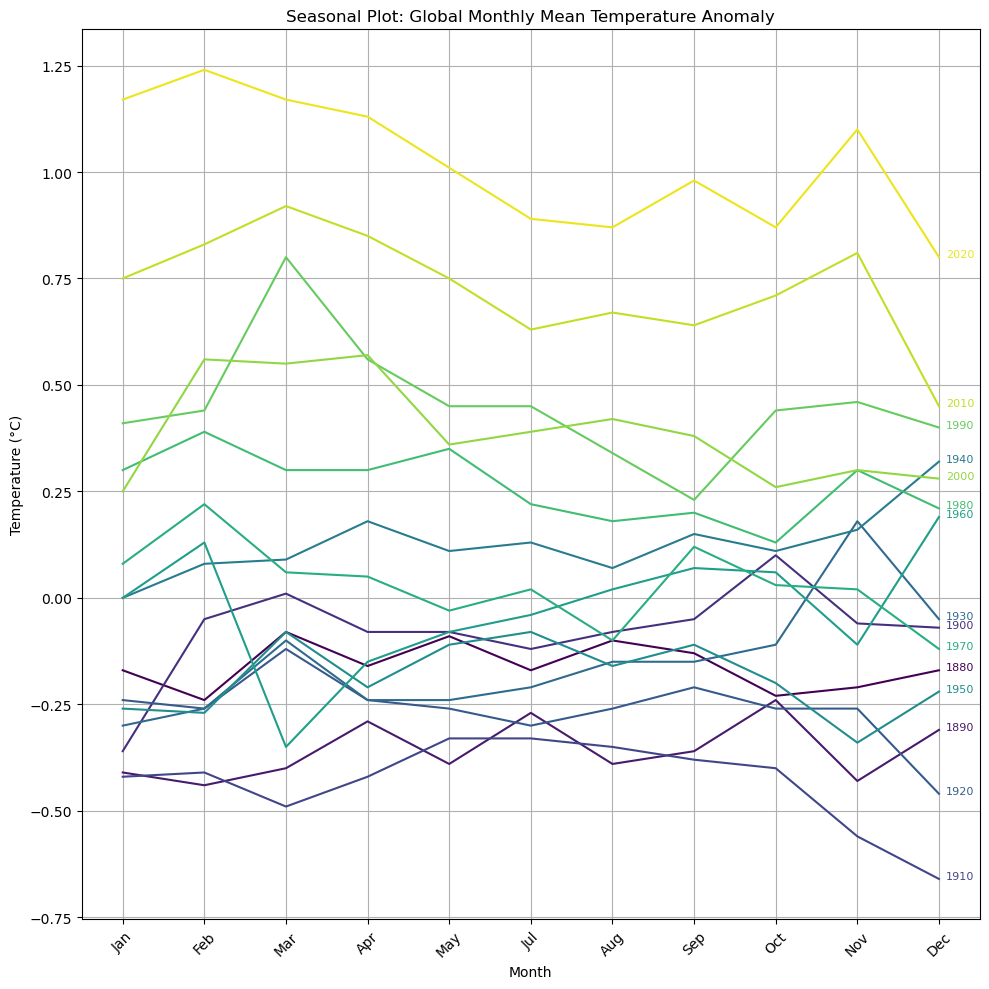

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Define a colormap
cmap = colormaps['viridis']

# Group by 'Year' and plot lines for each group, but only every 10th year
fig, ax = plt.subplots(figsize=(10, 10))
for year, group in df.groupby('Year'):
    if year % 10 == 0:  # Plot only every 10th year
        color = cmap((year - df['Year'].min()) / (df['Year'].max() - df['Year'].min()))  # Calculate color based on the year
        ax.plot(group['Month'], group['Value'], label=str(year), color = color)
     # Annotate the last point of each line with the year
        ax.annotate(str(year), (group['Month'].iloc[-1], group['Value'].iloc[-1]), textcoords="offset points", xytext=(5, 0), ha='left', fontsize=8, color=color)
      

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel(u'Temperature (\N{DEGREE SIGN}C)')
ax.set_title('Seasonal Plot: Global Monthly Mean Temperature Anomaly')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

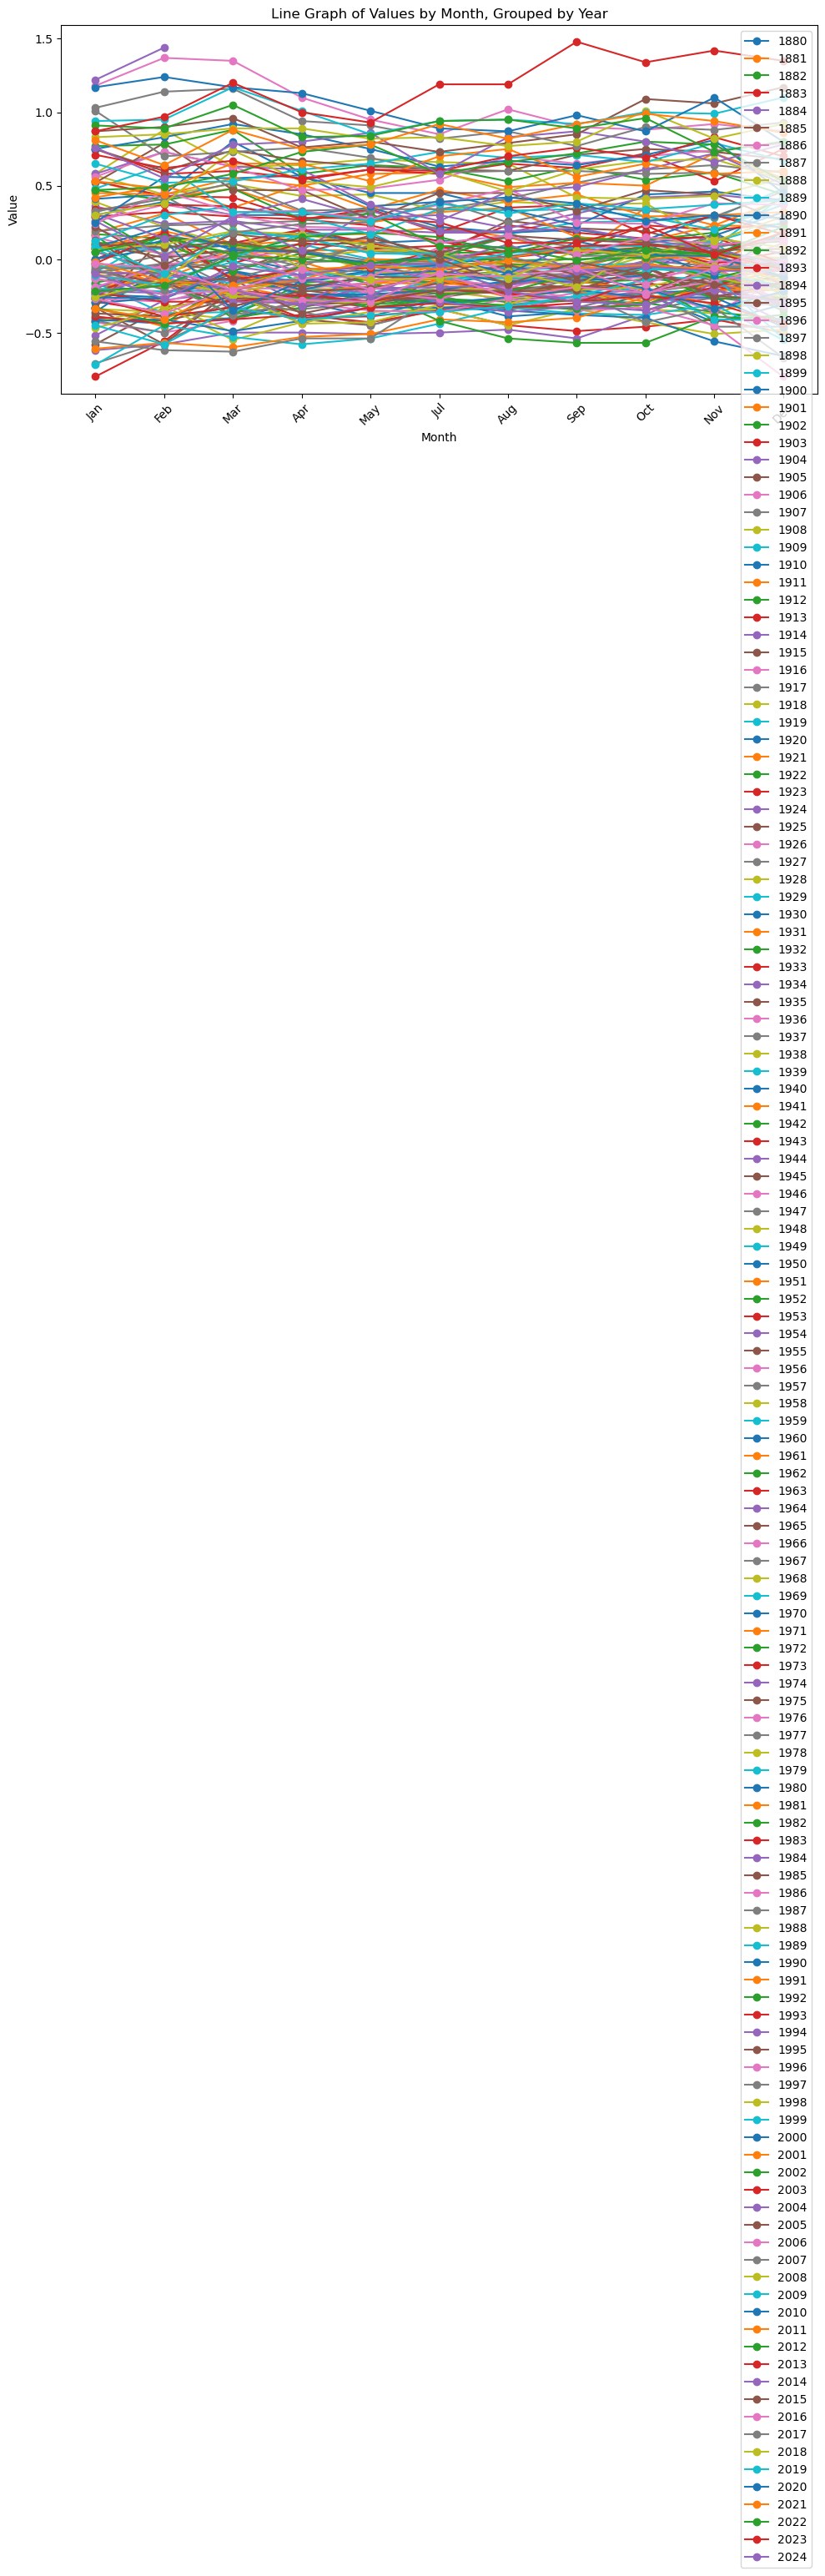

In [178]:
fig, ax = plt.subplots(figsize = (10,20))

# Group by 'Year' and plot lines for each group
for year, group in df.groupby('Year'):
    ax.plot(group['Month'], group['Value'], marker='o', label=str(year))

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Line Graph of Values by Month, Grouped by Year')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show();

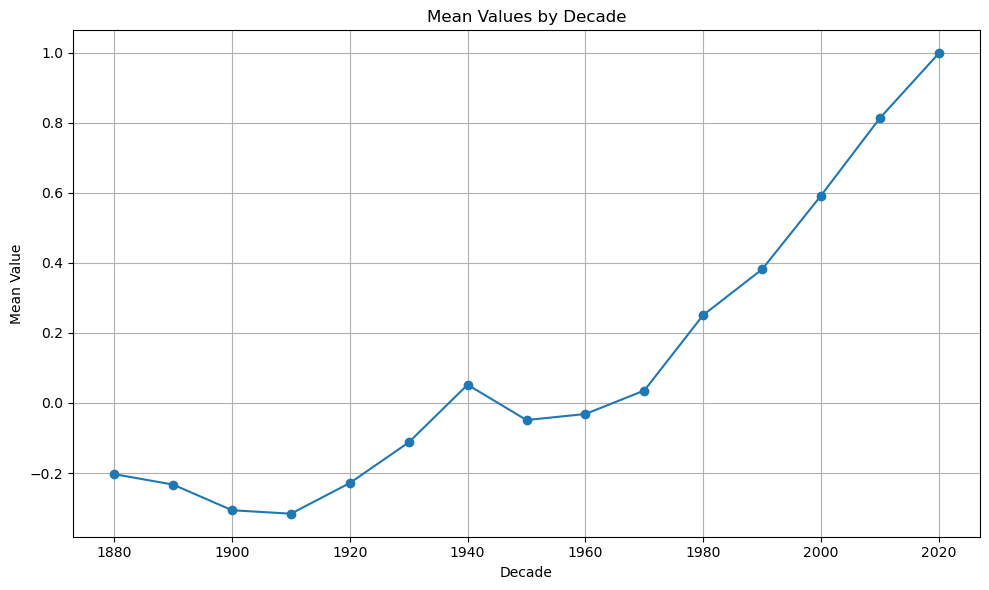

In [179]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract decade from 'Year' column
df['Decade'] = (df['Year'] // 10) * 10

# Group by 'Decade' and calculate mean values
mean_values_by_decade = df.groupby('Decade')['Value'].mean()

# Plot the mean values by decade
ax.plot(mean_values_by_decade.index, mean_values_by_decade.values, marker='o', linestyle='-')

# Set labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values by Decade')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()